In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm
import os, sys
from Assemble_By_Gaussian_Functions import *

In [3]:
def Norm(_x):
    return (_x - _x.min())/(_x.max() - _x.min())

def Album(_df, ch=1):
    
    # Create album with ni rows and nj columns
    ni = 5
    nj = 10

    # If album dataframe is larger than the number cells placed in the album, sample the appropriate number of cells 
    if len(_df) > ni*nj:
        _df = _df.sample(n=ni*nj, random_state=0)
    
    # Loop through the album dataframe by row 
    for p, img_name in enumerate(_df['image']):
        
        # Load png single cell images, and resize to a square shape (optional)
        img = np.moveaxis(np.array(Image.open(os.path.join('datasets/single_cells', img_name)).resize((128, 128))), -1, 0)

        plt.subplot(ni, nj, p + 1)
        mask = (img[-1] > 150)
        
        # Single channel single cell images (protein of interest)
        if  ch == 1:
            img_final = img[0] * mask
            plt.imshow(img_final, cmap='Greys_r')
            plt.axis('off')
        
        # Two channel single cell images (protein of interest, with cellular dye)
        if  ch == 2:
            h, w = img.shape[-2:]
            rgb = np.zeros([h, w, 3])
            rgb[:, :, 0] = Norm(img[0] * mask)
            rgb[:, :, 1] = Norm(img[1] * mask)
            plt.imshow(rgb)
            plt.axis('off')

In [4]:
# load imaged cells dataframe
df_raw = pd.read_csv('Cells_Imaged.csv')

print(df_raw.shape)
# print(df_raw['sgRNA'].value_counts())

(2329, 33)


In [5]:
# create a list of sgRNA to create albums for. Here eliminate low count sgRNAs
df = df_raw.copy()

n_cells_min = 50

df_counts = df['sgRNA'].value_counts().reset_index()
sgRNA_list = df_counts[df_counts['count'] >= n_cells_min]['sgRNA']

print(len(sgRNA_list))
print(sgRNA_list)

13
0         TFAM_1_6_49
1     SRPK1_2_15_1239
2     ATXN2L_1_21_108
3      GANAB_1_23_359
4        RPS19_1_4_23
5        RPL35_2_3_14
6      ACIN1_8_18_268
7       RPL23A_2_4_34
8     SLC25A11_1_7_84
9       IMPDH2_1_13_6
10     CACTIN_1_9_228
11        NOL7_3_7_13
12     NUCKS1_1_6_891
Name: sgRNA, dtype: object


  0%|          | 0/13 [00:00<?, ?it/s]

------------------------------------------------------
TFAM_1_6_49  number of cells: 150


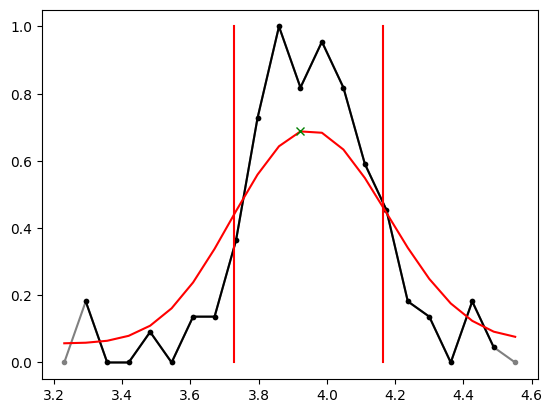

  8%|▊         | 1/13 [00:02<00:26,  2.17s/it]

------------------------------------------------------
SRPK1_2_15_1239  number of cells: 131


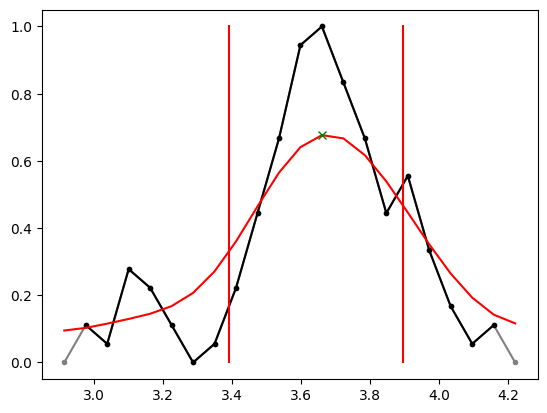

 15%|█▌        | 2/13 [00:04<00:24,  2.19s/it]

------------------------------------------------------
ATXN2L_1_21_108  number of cells: 79


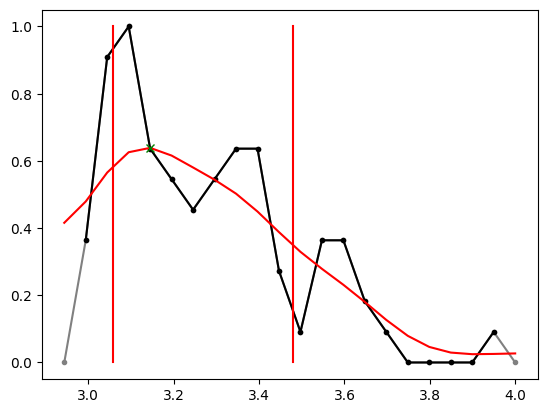

 23%|██▎       | 3/13 [00:06<00:21,  2.20s/it]

------------------------------------------------------
GANAB_1_23_359  number of cells: 77


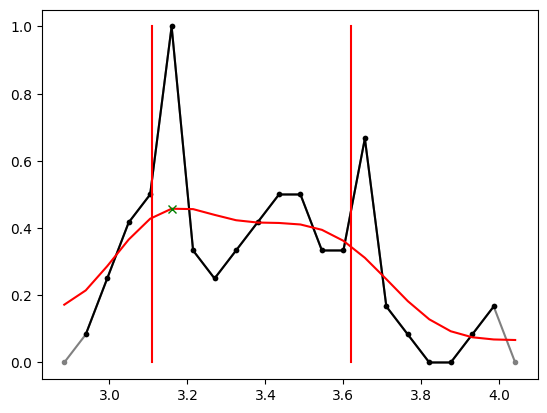

 31%|███       | 4/13 [00:08<00:19,  2.18s/it]

------------------------------------------------------
RPS19_1_4_23  number of cells: 75


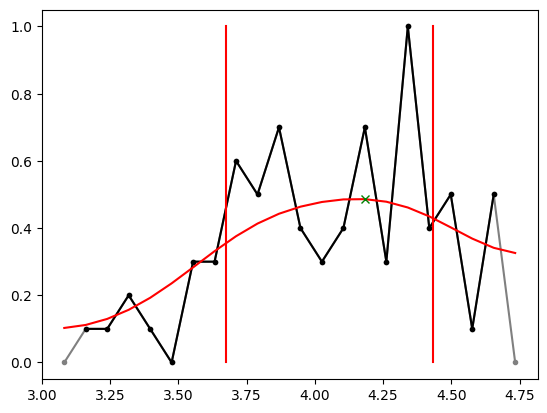

 38%|███▊      | 5/13 [00:10<00:17,  2.19s/it]

------------------------------------------------------
RPL35_2_3_14  number of cells: 73


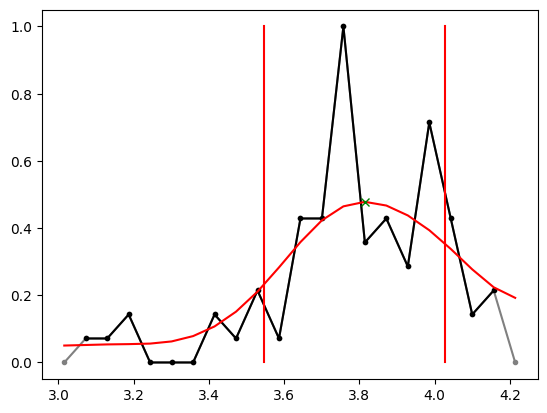

 46%|████▌     | 6/13 [00:13<00:15,  2.19s/it]

------------------------------------------------------
ACIN1_8_18_268  number of cells: 71


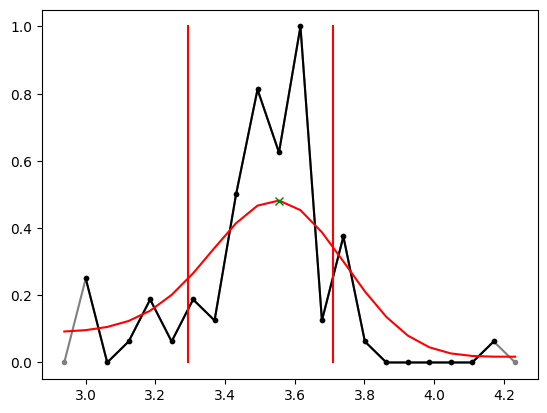

 54%|█████▍    | 7/13 [00:15<00:13,  2.20s/it]

------------------------------------------------------
RPL23A_2_4_34  number of cells: 68


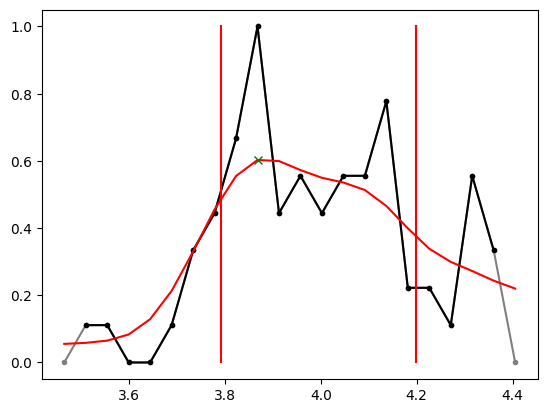

 62%|██████▏   | 8/13 [00:17<00:10,  2.15s/it]

------------------------------------------------------
SLC25A11_1_7_84  number of cells: 65


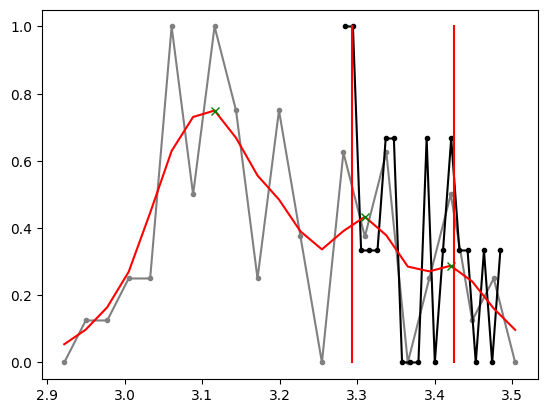

 69%|██████▉   | 9/13 [00:18<00:06,  1.74s/it]

------------------------------------------------------
IMPDH2_1_13_6  number of cells: 64


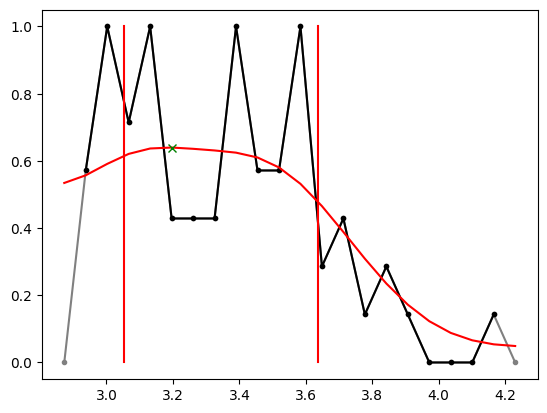

 77%|███████▋  | 10/13 [00:20<00:05,  1.79s/it]

------------------------------------------------------
CACTIN_1_9_228  number of cells: 61


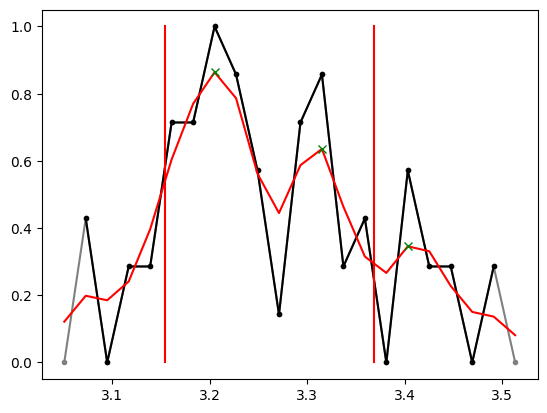

 85%|████████▍ | 11/13 [00:22<00:03,  1.83s/it]

------------------------------------------------------
NOL7_3_7_13  number of cells: 59


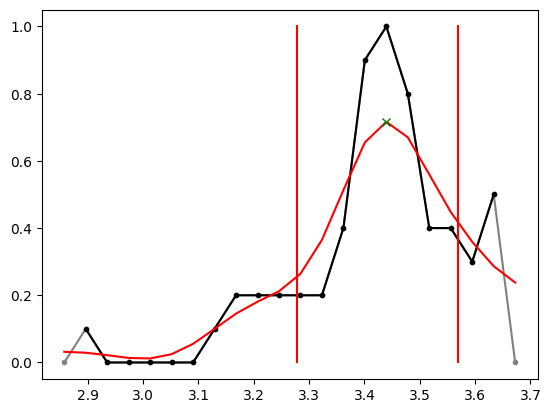

 92%|█████████▏| 12/13 [00:23<00:01,  1.85s/it]

------------------------------------------------------
NUCKS1_1_6_891  number of cells: 51


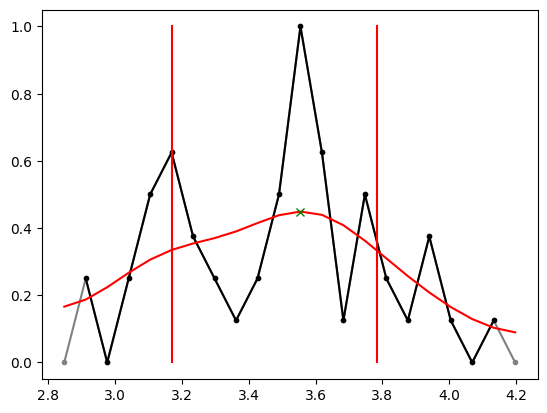

100%|██████████| 13/13 [00:25<00:00,  1.96s/it]


In [6]:
df = df_raw.copy()

album_size = 50

for sgRNA in tqdm(sgRNA_list):
        
    df_sgRNA = df[df['sgRNA'] == sgRNA]
    
    print('------------------------------------------------------')
    print(sgRNA, ' number of cells:', len(df_sgRNA))
    
    if len(df_sgRNA) >= album_size:
        Z = np.log10(df_sgRNA['ints_avg_Halo'])
        pick_range, _ = Find_Intensity_Peaks(Z, bins=20, verbose=True)
        df_album = df_sgRNA.copy()
        df_album = df_album[df_album['ints_avg_Halo'] >= 10**pick_range[0]]
        df_album = df_album[df_album['ints_avg_Halo'] <= 10**pick_range[1]]
    else:
        df_album = df_sgRNA.copy()

    fig = plt.figure(figsize=(12, 7), dpi=150)
    # fig.subplots_adjust(left=0, bottom=0, right=1, top=1, hspace=0.02, wspace=0.02)
    plt.suptitle(sgRNA)
    Album(df_album, ch=1)
    
    plt.savefig('albums/' + sgRNA + '.png')
    # plt.show()
    # sys.exit()
    
    plt.clf()
    plt.close()